# SurfAnalysis - example
# Basic Mapping and plotting
This is a example of how to map volumes to the surface and to plot the result on a flat map using the the SurfAnalysisPy toolbox. 

In [1]:
# Import the necesarry modules for this example 
import surfAnalysisPy as surf
import numpy as np
import nibabel as nb
import nitools as nt
import os
import matplotlib.pyplot as plt

In [2]:
# Define the file names with paths used in this example: 
# 1. Functional file 
s02func = os.path.join('../example_individual','con_TOM-average_4.nii')
# 2. Define the relevant gifti files for both left and right hemisphere:
s02white = [] # White -gray matter surface 
s02pial = []  # Pial surface 
s02sulc = []  # Sulcal depth 
hemN = ['L','R']
for h,hem in enumerate(hemN):   
    s02white.append(os.path.join('../example_individual','s02.' + hem + '.white.32k.surf.gii'))
    s02pial.append(os.path.join('../example_individual','s02.' + hem + '.pial.32k.surf.gii'))
    s02sulc.append(os.path.join('../example_individual','s02.' + hem + '.sulc.32k.shape.gii'))

## Mapping of volumes to surface
To map functional data to the surface, we can use the vol_to_surf function.
This returns a data array of the size of the hemisphere. 

In [3]:
# Map a Nifti to the surface of left hemisphere 
DL = surf.map.vol_to_surf([s02func],s02pial[0],s02white[0])
# Map a Nifti to the surface of right hemisphere 
DR = surf.map.vol_to_surf([s02func],s02pial[1],s02white[1])



## Saving the mapped data

In [10]:
## Saving the data to a gifti (seperately for each hemisphere)
GIFTIL = nt.gifti.make_func_gifti(DL,anatomical_struct='CortexLeft',column_names=['TOM'])
GIFTIR = nt.gifti.make_func_gifti(DR,anatomical_struct='CortexRight',column_names=['TOM'])

nb.save(GIFTIL,'example.hem-L.func.gii')
nb.save(GIFTIR,'example.hem-R.func.gii')

In [12]:
# If you want a CIFTI file (for both hemispheres together), you can use the following command:
CIFTI = nt.cifti.join_giftis_to_cifti([GIFTIL,GIFTIR], mask=[None, None])
nb.save(CIFTI,'example.dscalar.nii')

## Plotting flat surfaces
The data can then be plotted a color map using a flatmap 

<AxesSubplot:>

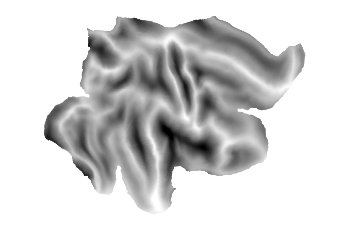

In [4]:
surf.plot.plotmap(DL*np.nan,'fs32k_R',cscale = [-2,2],underscale=[-1.5,1])

## Advanced options
Sizing of the Figures and Plots can be achieved using matplot lib to defined axes.
surf.plot always plots to the active subplot - and respects the overall figure and subplot sizing.  
If we set the threshold to -1,1 only the activity that exceeds the this negative and positive threshold. Places below these threshold show the underlay map - here the sulcal depth. 
 

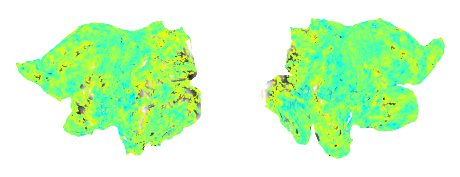

In [5]:
fig = plt.figure(figsize=(8,3))
ax1 = plt.subplot(1,2,1)
ax2 = surf.plot.plotmap(DL,'fs32k_L',underlay = s02sulc[0],cscale = [-3,3],threshold= [-1,1])
ax3 = plt.subplot(1,2,2)
ax4 = surf.plot.plotmap(DR,'fs32k_R',underlay = s02sulc[1],cscale = [-3,3],threshold= [-1,1])
plt.show()